<a href="https://colab.research.google.com/github/SR14-src/ML/blob/main/Car_price_prediction_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1) (2).zip


In [121]:
!unzip archive (1).zip.zip -d /content/archive (1).zip

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `unzip archive (1).zip.zip -d /content/archive (1).zip'


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [123]:
dataset=pd.read_csv('/content/archive (1).zip')
dataset

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [124]:
dataset.shape

(19237, 18)

In [125]:
dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [126]:
dataset.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [127]:
dataset.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [128]:
dataset['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [129]:
dataset['Model'].unique()

array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
       'Prius C aqua'], dtype=object)

In [130]:
dataset['Model'].nunique()

1590

In [131]:
for col_names in dataset.columns:
  print(col_names,"=",dataset[col_names].nunique())

ID = 18924
Price = 2315
Levy = 559
Manufacturer = 65
Model = 1590
Prod. year = 54
Category = 11
Leather interior = 2
Fuel type = 7
Engine volume = 107
Mileage = 7687
Cylinders = 13
Gear box type = 4
Drive wheels = 3
Doors = 3
Wheel = 2
Color = 16
Airbags = 17


In [132]:
first_10_cars=dataset['Manufacturer'].value_counts().head(10)
first_10_cars

,count
Manufacturer,
HYUNDAI,3769
TOYOTA,3662
MERCEDES-BENZ,2076
FORD,1111
CHEVROLET,1069
BMW,1049
LEXUS,982
HONDA,977
NISSAN,660


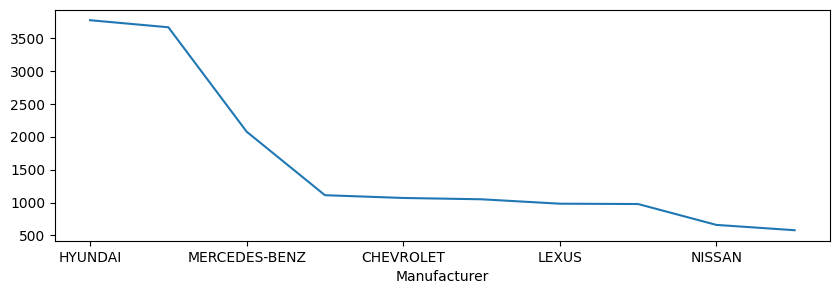

In [133]:
plt.figure(figsize=(10,3))
first_10_cars.plot()
plt.show()

<Axes: xlabel='Manufacturer'>

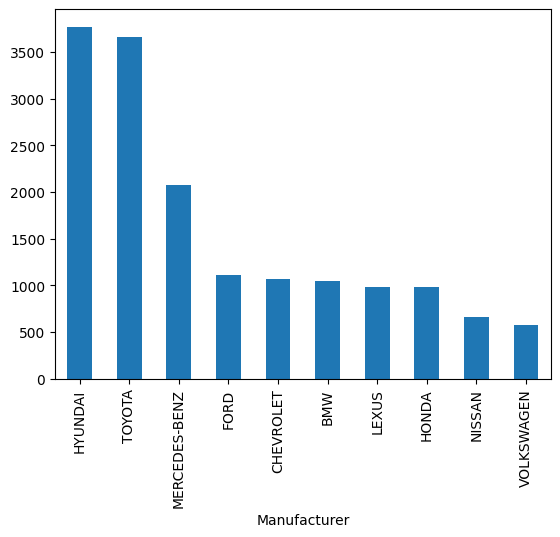

In [134]:
first_10_cars.plot(kind='bar')

In [135]:
mean_top_10_cars=[dataset[dataset['Manufacturer']==i]['Price'].mean() for i in list(first_10_cars.index)]
mean_top_10_cars

[22338.447864154947,
 14248.982250136538,
 18609.38294797688,
 15573.98199819982,
 14926.368568755846,
 20876.79218303146,
 19191.27698574338,
 14291.335721596724,
 10032.327272727272,
 11640.421416234887]

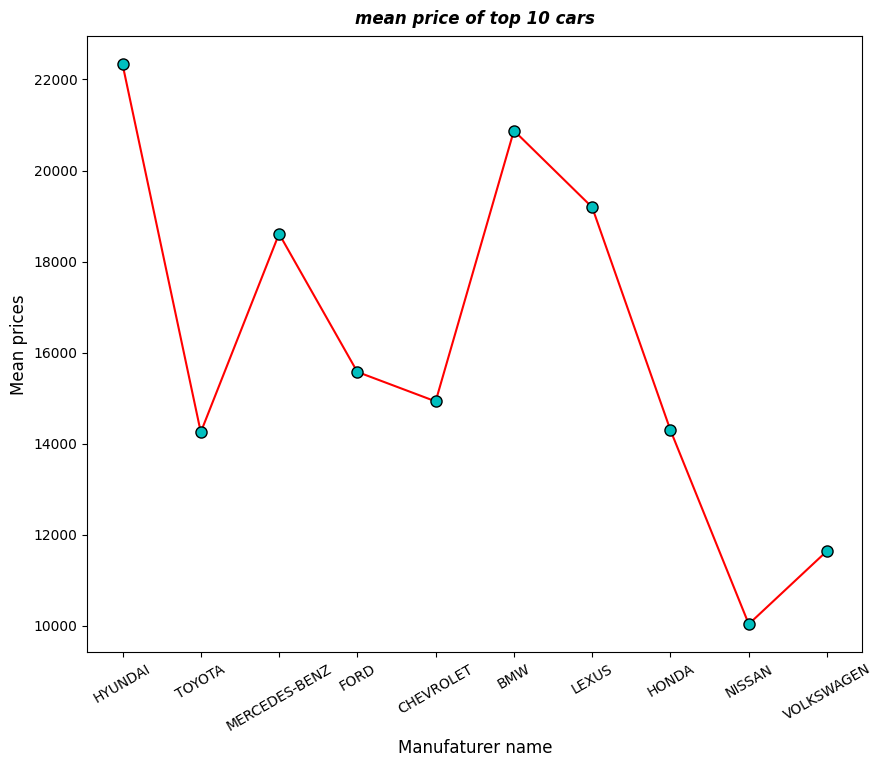

In [136]:
plt.figure(figsize=(10,8))
plt.plot(first_10_cars.index,mean_top_10_cars,marker='o',ms=8,mec='k',mfc='c',color='red')
plt.title('mean price of top 10 cars',va='bottom',fontweight='heavy',fontstyle='oblique')
plt.xlabel('Manufaturer name',fontsize=12)
plt.ylabel('Mean prices',fontsize=12)
plt.xticks(rotation=30)
plt.show()

In [137]:
cor=dataset.corr(numeric_only=1)
cor

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000844,0.071352,-0.039319,-0.020527
Price,-0.000844,1.000000,0.012982,0.007518,-0.012824
Prod. year,0.071352,0.012982,1.000000,-0.096797,0.236969
Cylinders,-0.039319,0.007518,-0.096797,1.000000,0.176868
Airbags,-0.020527,-0.012824,0.236969,0.176868,1.000000


<Axes: >

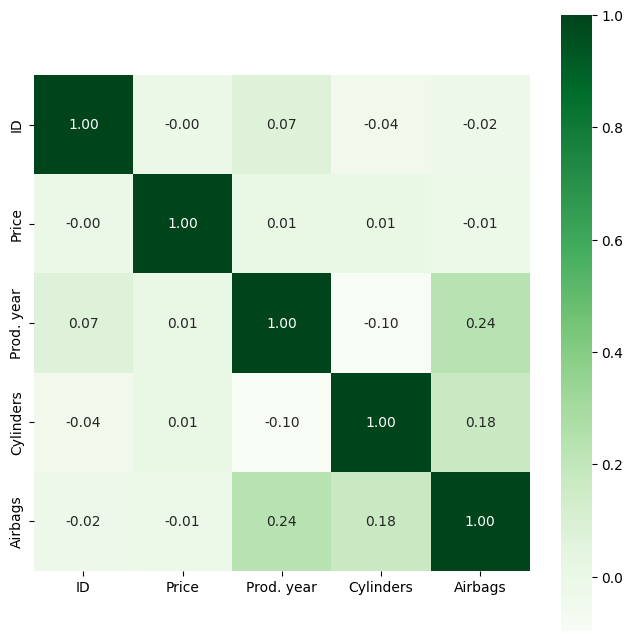

In [138]:
plt.figure(figsize=(8,8))
sns.heatmap(cor,square=True,annot=True,fmt='.2f',cmap='Greens')

In [139]:
dataset

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [140]:
dataset=dataset.drop(['ID','Doors'],axis=1)

In [141]:
dataset

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4


In [142]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memo

In [143]:
import datetime
dtime=datetime.datetime.now()
dtime

datetime.datetime(2024, 9, 22, 9, 41, 14, 837206)

In [144]:
dataset['Age']=dtime.year-dataset['Prod. year']

In [146]:
dataset['Mileage'] =dataset['Mileage'].str.replace('km',"")
dataset['Mileage'] = dataset['Mileage'].astype('Int64')

In [147]:
dataset['Levy'] = dataset['Levy'].str.replace('-', '0')
dataset['Levy'] = dataset['Levy'].astype(float)

In [148]:
dataset['Engine volume'] = dataset['Engine volume'].str.replace('Turbo','')
dataset['Engine volume'] = dataset['Engine volume'].astype('float64')

In [149]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  Int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
 16  Age               19237 non-null  int64 

In [150]:
obj=dataset.select_dtypes(include='object')
non_obj=dataset.select_dtypes(exclude='object')

In [151]:
obj

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...
19232,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,Manual,Rear,Left wheel,Silver
19233,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Grey
19235,CHEVROLET,Captiva,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Black


In [152]:
non_obj

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,13328,1399.0,2010,3.5,186005,6.0,12,14
1,16621,1018.0,2011,3.0,192000,6.0,8,13
2,8467,0.0,2006,1.3,200000,4.0,2,18
3,3607,862.0,2011,2.5,168966,4.0,0,13
4,11726,446.0,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...
19232,8467,0.0,1999,2.0,300000,4.0,5,25
19233,15681,831.0,2011,2.4,161600,4.0,8,13
19234,26108,836.0,2010,2.0,116365,4.0,4,14
19235,5331,1288.0,2007,2.0,51258,4.0,4,17


In [153]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

In [154]:
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])

In [155]:
obj.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,32,1242,4,1,2,0,0,0,12
1,8,658,4,0,5,2,0,0,1
2,21,684,3,0,5,3,1,1,1
3,16,661,4,1,2,0,0,0,14
4,21,684,3,1,5,0,1,0,12


In [156]:
obj=obj.astype('int')

In [157]:
obj.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Manufacturer      19237 non-null  int64
 1   Model             19237 non-null  int64
 2   Category          19237 non-null  int64
 3   Leather interior  19237 non-null  int64
 4   Fuel type         19237 non-null  int64
 5   Gear box type     19237 non-null  int64
 6   Drive wheels      19237 non-null  int64
 7   Wheel             19237 non-null  int64
 8   Color             19237 non-null  int64
dtypes: int64(9)
memory usage: 1.3 MB


In [158]:
dataset=pd.concat([obj,non_obj],axis=1)

In [159]:
dataset

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,32,1242,4,1,2,0,0,0,12,13328,1399.0,2010,3.5,186005,6.0,12,14
1,8,658,4,0,5,2,0,0,1,16621,1018.0,2011,3.0,192000,6.0,8,13
2,21,684,3,0,5,3,1,1,1,8467,0.0,2006,1.3,200000,4.0,2,18
3,16,661,4,1,2,0,0,0,14,3607,862.0,2011,2.5,168966,4.0,0,13
4,21,684,3,1,5,0,1,0,12,11726,446.0,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,36,385,1,1,0,1,2,0,12,8467,0.0,1999,2.0,300000,4.0,5,25
19233,23,1334,9,1,5,2,1,0,11,15681,831.0,2011,2.4,161600,4.0,8,13
19234,23,1442,4,1,1,0,1,0,7,26108,836.0,2010,2.0,116365,4.0,4,14
19235,8,456,4,1,1,0,1,0,1,5331,1288.0,2007,2.0,51258,4.0,4,17


In [160]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      19237 non-null  int64  
 1   Model             19237 non-null  int64  
 2   Category          19237 non-null  int64  
 3   Leather interior  19237 non-null  int64  
 4   Fuel type         19237 non-null  int64  
 5   Gear box type     19237 non-null  int64  
 6   Drive wheels      19237 non-null  int64  
 7   Wheel             19237 non-null  int64  
 8   Color             19237 non-null  int64  
 9   Price             19237 non-null  int64  
 10  Levy              19237 non-null  float64
 11  Prod. year        19237 non-null  int64  
 12  Engine volume     19237 non-null  float64
 13  Mileage           19237 non-null  Int64  
 14  Cylinders         19237 non-null  float64
 15  Airbags           19237 non-null  int64  
 16  Age               19237 non-null  int64 

In [161]:
x=dataset.drop(['Price'],axis=1)
y=dataset['Price']

In [162]:
x

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,32,1242,4,1,2,0,0,0,12,1399.0,2010,3.5,186005,6.0,12,14
1,8,658,4,0,5,2,0,0,1,1018.0,2011,3.0,192000,6.0,8,13
2,21,684,3,0,5,3,1,1,1,0.0,2006,1.3,200000,4.0,2,18
3,16,661,4,1,2,0,0,0,14,862.0,2011,2.5,168966,4.0,0,13
4,21,684,3,1,5,0,1,0,12,446.0,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,36,385,1,1,0,1,2,0,12,0.0,1999,2.0,300000,4.0,5,25
19233,23,1334,9,1,5,2,1,0,11,831.0,2011,2.4,161600,4.0,8,13
19234,23,1442,4,1,1,0,1,0,7,836.0,2010,2.0,116365,4.0,4,14
19235,8,456,4,1,1,0,1,0,1,1288.0,2007,2.0,51258,4.0,4,17


In [163]:
y

,Price
0,13328
1,16621
2,8467
3,3607
4,11726
...,...
19232,8467
19233,15681
19234,26108
19235,5331


In [164]:
from sklearn.model_selection import train_test_split

In [165]:
x=dataset.drop(['Price'],axis=1)

In [166]:
y=dataset['Price']

In [167]:
x

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,32,1242,4,1,2,0,0,0,12,1399.0,2010,3.5,186005,6.0,12,14
1,8,658,4,0,5,2,0,0,1,1018.0,2011,3.0,192000,6.0,8,13
2,21,684,3,0,5,3,1,1,1,0.0,2006,1.3,200000,4.0,2,18
3,16,661,4,1,2,0,0,0,14,862.0,2011,2.5,168966,4.0,0,13
4,21,684,3,1,5,0,1,0,12,446.0,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,36,385,1,1,0,1,2,0,12,0.0,1999,2.0,300000,4.0,5,25
19233,23,1334,9,1,5,2,1,0,11,831.0,2011,2.4,161600,4.0,8,13
19234,23,1442,4,1,1,0,1,0,7,836.0,2010,2.0,116365,4.0,4,14
19235,8,456,4,1,1,0,1,0,1,1288.0,2007,2.0,51258,4.0,4,17


In [168]:
y

,Price
0,13328
1,16621
2,8467
3,3607
4,11726
...,...
19232,8467
19233,15681
19234,26108
19235,5331


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [170]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [178]:
Model_LR=LinearRegression()
Model_RF=RandomForestRegressor(n_estimators=100, max_features= 7)
Model_SVC=SVR()
Model_XGB=XGBRegressor(ax_depth =7, n_estimators=500, learning_rate =.05)
Model_GBoosting=GradientBoostingRegressor(learning_rate =.07, max_depth =7, verbose=0)
Model_DT=DecisionTreeRegressor()

In [179]:
Algo=['LinearRegression','RandomForestRegressor','SVR','XGBRegressor','GradientBoostingRegressor','DecisionTreeRegressor']
R2=[]
RMSE=[]

In [180]:
def predict(model):
    model.fit(x_train,y_train)
    model.predict(x_test)
    r2=r2_score(y_test,model.predict(x_test))
    rmse=np.sqrt(mean_squared_error(y_test,model.predict(x_test)))
    R2.append(r2)
    RMSE.append(rmse)
    score=model.score(x_test,y_test)
    print(f'score of model is : {score}')

In [181]:
predict(Model_LR)
predict(Model_RF)
predict(Model_SVC)
predict(Model_XGB)
predict(Model_GBoosting)
predict(Model_DT)

score of model is : 0.03117021916724627
score of model is : -7.750298748199512
score of model is : -0.048485388201379376


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:48:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "ax_depth" } are not used.

  warnings.warn(smsg, UserWarning)


score of model is : 0.6334521185925923
score of model is : -392.2947164561915
score of model is : -464.20433524978523
